# Práctico 1 - Procesamiento Digital de Imágenes

In [86]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

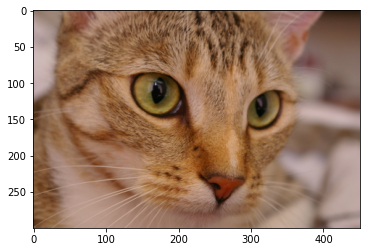

In [88]:
# Cargar la imagen
img_rgb = imageio.imread('imageio:chelsea.png')/255

# Mostrar la imagen
plt.imshow(img_rgb)

## Seleccionar el canal rojo

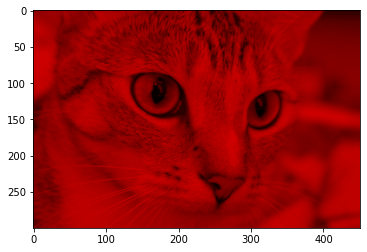

In [89]:
M = np.array([[1, 0, 0], 
              [0, 0, 0], 
              [0, 0, 0]])

img_canal_rojo = apply_matrix(img_rgb, M)

plt.imshow(img_canal_rojo)

## Imagen en escala de grises

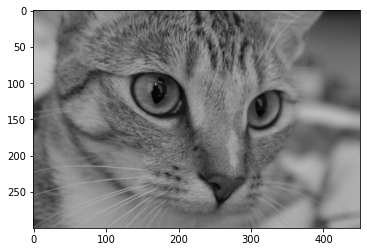

In [90]:
M = np.ones((3,3))/3

img_gris = apply_matrix(img_rgb, M)

plt.imshow(img_gris)

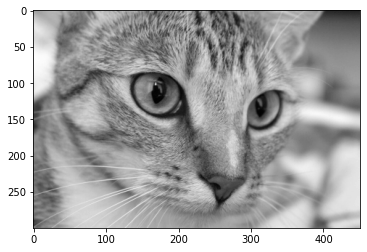

In [91]:
img_gris_2 = img_gris[:,:,0]

plt.imshow(img_gris_2, 'gray')

## Otros mapas de colores

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

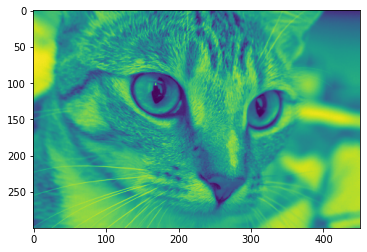

In [92]:
plt.imshow(img_gris_2)

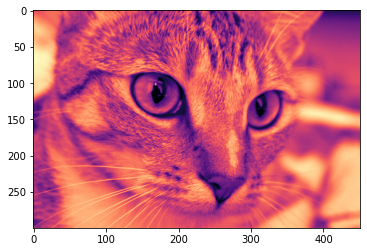

In [12]:
plt.imshow(img_gris_2, 'magma')

## Matriz aleatoria

[[0.63305784 0.15899871 0.43237881]
 [0.68998916 0.39009582 0.71731736]
 [0.22598197 0.57611044 0.13775259]]


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

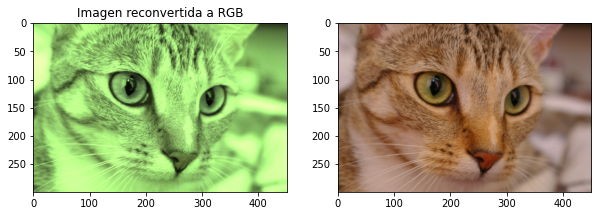

In [93]:
M = np.random.rand(3, 3)

img_random = apply_matrix(img_rgb, M)

M_inv = np.linalg.inv(M)
img_random_inv = apply_matrix(img_random, M_inv)

print(M)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title('Matriz aleatoria')
axes[1].imshow(np.clip(img_random_inv, 0, 1))
axes[0].set_title('Imagen reconvertida a RGB')

## 1. Intercambiar los canales: R->G, G->B, B->R

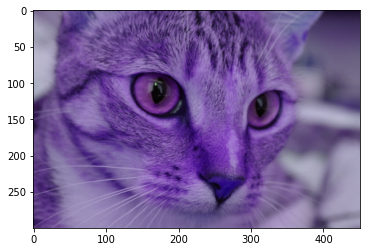

In [95]:
M = np.array([[0, 1, 0], 
              [0, 0, 1], 
              [1, 0, 0]])

img_gbr = apply_matrix(img_rgb, M)

plt.imshow(img_gbr)

## 2. Operaciones en el espacio YIQ

1. Convertir la imagen de RGB a YIQ
2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ por $\beta>=0$
3. Convertir la imagen de YIQ a RGB
4. Truncar los valores RGB al rango \[0,1\] (utilizar np.clip)
5. Mostrar la imagen original y la imagen procesada

[[0.55603813 0.         0.        ]
 [0.         0.04834606 0.        ]
 [0.         0.         0.04834606]]


Text(0.5, 1.0, 'Imagen procesada')

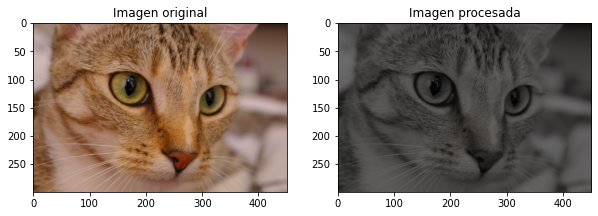

In [96]:
M_rgb2yiq = np.array([[0.299,     0.587,     0.114],
                      [0.595716, -0.274453, -0.321263],
                      [0.211456, -0.522591,  0.311135]])

img_yiq = apply_matrix(img_rgb, M_rgb2yiq) 

alpha = np.random.rand() # valor de alpha aleatorio entre 0 y 1
while alpha == 0:
    alpha = np.random.rand() # en caso que alpha sea 0

beta = np.random.rand() # valor de beta aleatorio entre 0 y 1

M_yiq = np.array([[alpha, 0,    0],
                  [0,     beta, 0],
                  [0,     0,    beta]])

img_yiq1 = apply_matrix(img_yiq, M_yiq) # img_y'i'q' 

M_inv = np.linalg.inv(M_rgb2yiq)
img_rgb1 = apply_matrix(img_yiq1, M_inv) # img_r'g'b'

print(M_yiq)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Imagen original')
axes[1].imshow(np.clip(img_rgb1, 0, 1))
axes[1].set_title('Imagen procesada')

## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

<IPython.core.display.Javascript object>


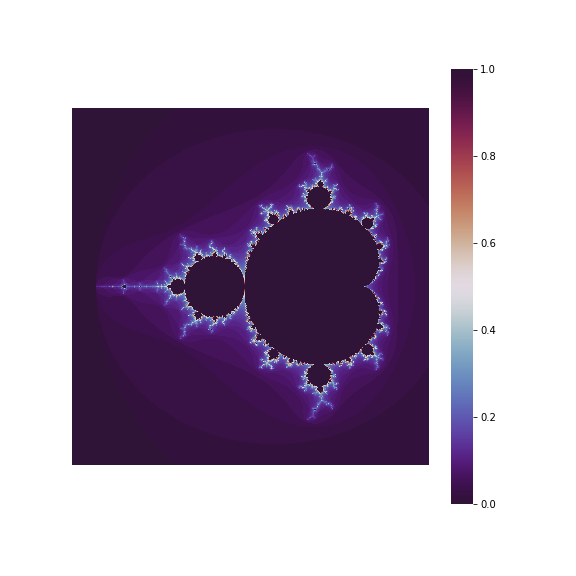

<AxesSubplot:>

In [26]:
import seaborn as sns
%matplotlib notebook

x = np.load('mandelbrot.npy')

fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='twilight_shifted', square=True, xticklabels=False, yticklabels=False)